In [1]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")

from KETIPrePartialDataPreprocessing import main
import setting
inputType ='file' # or file

In [2]:
setting.imputation_param

{'serialImputation': {'flag': True,
  'imputation_method': [{'min': 0,
    'max': 10,
    'method': 'MICE',
    'parameter': {}}],
  'totalNanLimit': 20}}

In [3]:
# Declare your own data
input_data = main.inputControl(inputType)
# Make noise
import numpy as np
input_test_data = input_data.replace(4.0, np.nan)

In [4]:
# Preprocessing
from KETIPrePartialDataPreprocessing import data_preprocessing
#column_name ='in_temp'
input_data =  input_test_data[:2000]
partialP = data_preprocessing.packagedPartialProcessing(setting.process_param)
output = partialP.allPartialProcessing(input_data)

temp
co2
pm10
getDataWithCertainNaN
getDataWithUncertainNaN
0.48619072433559146 0.5834288692027098
timedate
2021-01-28 12:51:00    NaN
2021-01-28 12:52:00    0.0
2021-01-28 12:53:00    NaN
2021-01-28 12:54:00    NaN
2021-01-28 12:55:00    NaN
                      ... 
2021-01-29 22:09:00    0.0
2021-01-29 22:10:00    0.0
2021-01-29 22:11:00    0.0
2021-01-29 22:12:00    0.0
2021-01-29 22:13:00    0.0
Freq: 60S, Name: temp, Length: 2003, dtype: float64
timedate
2021-01-28 12:51:00    NaN
2021-01-28 12:52:00    NaN
2021-01-28 12:53:00    NaN
2021-01-28 12:54:00    NaN
2021-01-28 12:55:00    NaN
                      ... 
2021-01-29 22:09:00    0.0
2021-01-29 22:10:00    0.0
2021-01-29 22:11:00    0.0
2021-01-29 22:12:00    0.0
2021-01-29 22:13:00    0.0
Freq: 60S, Name: temp, Length: 2003, dtype: float64
{Timestamp('2021-01-28 17:55:00'), Timestamp('2021-01-29 03:25:00'), Timestamp('2021-01-28 17:26:00'), Timestamp('2021-01-29 13:44:00'), Timestamp('2021-01-29 03:35:00'), Timestamp('202

key:  original Data Leangth: 2000 Data NaN Length: temp    81
co2     31
pm10     0
dtype: int64
                     temp  co2    pm10
timedate                              
2021-01-28 12:51:00   3.0  5.0 -9999.0
2021-01-28 12:52:00   3.0  5.0    64.0
2021-01-28 12:53:00   NaN  6.0    56.0
2021-01-28 12:54:00   NaN  7.0    59.0
2021-01-28 12:55:00   NaN  7.0    59.0
...                   ...  ...     ...
2021-01-29 22:09:00   1.0  3.0    48.0
2021-01-29 22:10:00   1.0  3.0    49.0
2021-01-29 22:11:00   1.0  3.0    48.0
2021-01-29 22:12:00   1.0  3.0    48.0
2021-01-29 22:13:00   1.0  3.0    48.0

[2000 rows x 3 columns]


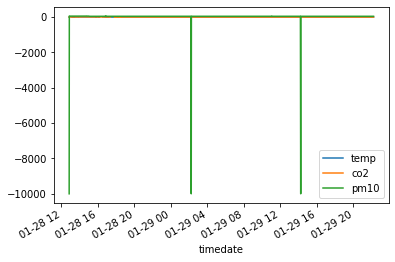

key:  refined_data Data Leangth: 2003 Data NaN Length: temp    84
co2     34
pm10     3
dtype: int64
                     temp  co2    pm10
timedate                              
2021-01-28 12:51:00   3.0  5.0 -9999.0
2021-01-28 12:52:00   3.0  5.0    64.0
2021-01-28 12:53:00   NaN  6.0    56.0
2021-01-28 12:54:00   NaN  7.0    59.0
2021-01-28 12:55:00   NaN  7.0    59.0
...                   ...  ...     ...
2021-01-29 22:09:00   1.0  3.0    48.0
2021-01-29 22:10:00   1.0  3.0    49.0
2021-01-29 22:11:00   1.0  3.0    48.0
2021-01-29 22:12:00   1.0  3.0    48.0
2021-01-29 22:13:00   1.0  3.0    48.0

[2003 rows x 3 columns]


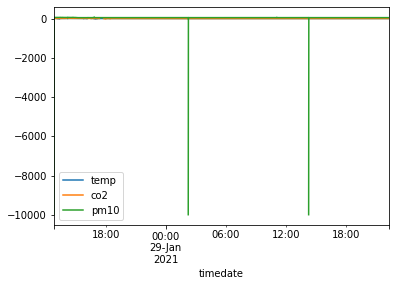

key:  datawithMoreCertainNaN Data Leangth: 2003 Data NaN Length: temp    84
co2     34
pm10     6
dtype: int64
                     temp  co2  pm10
timedate                            
2021-01-28 12:51:00   3.0  5.0   NaN
2021-01-28 12:52:00   3.0  5.0  64.0
2021-01-28 12:53:00   NaN  6.0  56.0
2021-01-28 12:54:00   NaN  7.0  59.0
2021-01-28 12:55:00   NaN  7.0  59.0
...                   ...  ...   ...
2021-01-29 22:09:00   1.0  3.0  48.0
2021-01-29 22:10:00   1.0  3.0  49.0
2021-01-29 22:11:00   1.0  3.0  48.0
2021-01-29 22:12:00   1.0  3.0  48.0
2021-01-29 22:13:00   1.0  3.0  48.0

[2003 rows x 3 columns]


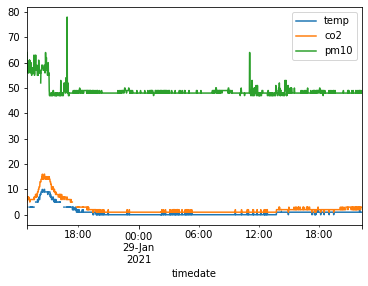

key:  datawithMoreUnCertainNaN Data Leangth: 2003 Data NaN Length: temp    3
co2     6
pm10    0
dtype: int64
                         temp  co2       pm10
timedate                                     
2021-01-28 12:51:00  3.000000  5.0  50.071316
2021-01-28 12:52:00  3.000000  5.0  64.000000
2021-01-28 12:53:00  3.089443  6.0  56.000000
2021-01-28 12:54:00  4.174520  7.0  59.000000
2021-01-28 12:55:00  3.439773  7.0  59.000000
...                       ...  ...        ...
2021-01-29 22:09:00  1.000000  3.0  48.000000
2021-01-29 22:10:00  1.000000  3.0  49.000000
2021-01-29 22:11:00  1.000000  3.0  48.000000
2021-01-29 22:12:00  1.000000  3.0  48.000000
2021-01-29 22:13:00  1.000000  3.0  48.000000

[2003 rows x 3 columns]


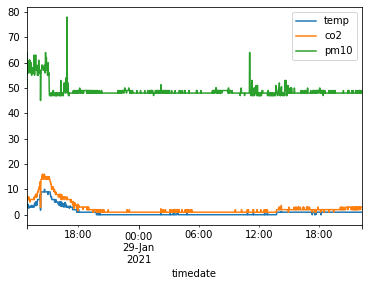

key:  imputed_data Data Leangth: 2003 Data NaN Length: temp    3
co2     6
pm10    0
dtype: int64
                         temp  co2       pm10
timedate                                     
2021-01-28 12:51:00  3.000000  5.0  50.071316
2021-01-28 12:52:00  3.000000  5.0  64.000000
2021-01-28 12:53:00  3.089443  6.0  56.000000
2021-01-28 12:54:00  4.174520  7.0  59.000000
2021-01-28 12:55:00  3.439773  7.0  59.000000
...                       ...  ...        ...
2021-01-29 22:09:00  1.000000  3.0  48.000000
2021-01-29 22:10:00  1.000000  3.0  49.000000
2021-01-29 22:11:00  1.000000  3.0  48.000000
2021-01-29 22:12:00  1.000000  3.0  48.000000
2021-01-29 22:13:00  1.000000  3.0  48.000000

[2003 rows x 3 columns]


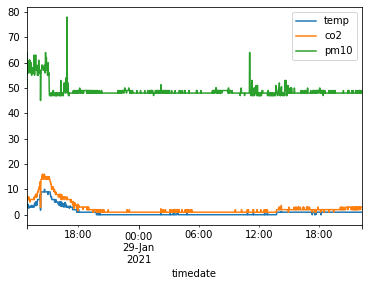

In [5]:
# Check each result
import matplotlib.pyplot as plt
for key in output:
    temp = output[key]
    print("key: ", key, "Data Leangth:", len(temp), "Data NaN Length:", temp.isna().sum())
    print(temp)
    temp.plot()
    plt.show()

In [6]:
import pandas as pd
np.random.seed(1997)
df = pd.DataFrame(np.random.choice([np.nan,1], p=(0.8,0.2),size=(10,10)))
print (df)

df1 = df.dropna(thresh=2, axis=1)
print (df1)


     0   1    2    3    4    5    6    7   8    9
0  NaN NaN  NaN  1.0  1.0  NaN  NaN  NaN NaN  NaN
1  1.0 NaN  1.0  NaN  NaN  NaN  NaN  NaN NaN  NaN
2  NaN NaN  NaN  NaN  NaN  1.0  1.0  NaN NaN  NaN
3  NaN NaN  NaN  NaN  1.0  NaN  NaN  NaN NaN  NaN
4  NaN NaN  NaN  NaN  NaN  1.0  NaN  NaN NaN  1.0
5  NaN NaN  NaN  1.0  1.0  NaN  NaN  1.0 NaN  1.0
6  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN
7  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN
8  NaN NaN  NaN  NaN  NaN  NaN  NaN  1.0 NaN  NaN
9  1.0 NaN  NaN  NaN  1.0  NaN  NaN  1.0 NaN  NaN
     0    3    4    5    7    9
0  NaN  1.0  1.0  NaN  NaN  NaN
1  1.0  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  NaN  1.0  NaN  NaN
3  NaN  NaN  1.0  NaN  NaN  NaN
4  NaN  NaN  NaN  1.0  NaN  1.0
5  NaN  1.0  1.0  NaN  1.0  1.0
6  NaN  NaN  NaN  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN  NaN  NaN
8  NaN  NaN  NaN  NaN  1.0  NaN
9  1.0  NaN  1.0  NaN  1.0  NaN
